## How many of the the top earning movies pass the Bechdel Test?

In [1]:
#used
%matplotlib inline
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt
import csv

3.6.3 |Anaconda, Inc.| (default, Oct  6 2017, 12:04:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
1.13.3
0.20.3


In [2]:
#used
mojo_df = pd.read_csv('../Data/all_movie_columns.csv', index_col = 0)

mojo_df.sort_values('Rank')

,bechdel_id,imdb_id,rating,title,release_yr,titleType,primaryTitle_x,originalTitle,isAdult,startYear,...,TitleYear,Rank,primaryTitle_y,Studio,Worldwide,Domestic,Domestic_Perc,Overseas,Overseas_Perc,Year
321,582,tt0499549,2,Avatar,2009,movie,Avatar,Avatar,0,2009,...,Avatar2009,1,Avatar,Fox,"$2,788.0",$760.5,27.3%,"$2,027.5",72.7%,2009
109,345,tt0120338,3,Titanic,1997,movie,Titanic,Titanic,0,1997,...,Titanic1997,2,Titanic,Par.,"$2,187.5",$659.4,30.1%,"$1,528.1",69.9%,1997
537,6610,tt2488496,3,Star Wars: The Force Awakens,2015,movie,Star Wars: The Force Awakens,Star Wars: Episode VII - The Force Awakens,0,2015,...,Star Wars: The Force Awakens2015,3,Star Wars: The Force Awakens,BV,"$2,068.2",$936.7,45.3%,"$1,131.6",54.7%,2015
580,8178,tt4154756,3,Avengers: Infinity War,2018,movie,Avengers: Infinity War,Avengers: Infinity War,0,2018,...,Avengers: Infinity War2018,4,Avengers: Infinity War,BV,"$2,044.2",$677.5,33.1%,"$1,366.6",66.9%,2018
253,6306,tt0369610,3,Jurassic World,2015,movie,Jurassic World,Jurassic World,0,2015,...,Jurassic World2015,5,Jurassic World,Uni.,"$1,671.7",$652.3,39.0%,"$1,019.4",61.0%,2015
547,6186,tt2820852,3,Furious 7,2015,movie,Furious 7,Furious Seven,0,2015,...,Furious 72015,7,Furious 7,Uni.,"$1,516.0",$353.0,23.3%,"$1,163.0",76.7%,2015
534,6217,tt2395427,3,Avengers: Age of Ultron,2015,movie,Avengers: Age of Ultron,Avengers: Age of Ultron,0,2015,...,Avengers: Age of Ultron2015,8,Avengers: Age of Ultron,BV,"$1,405.4",$459.0,32.7%,$946.4,67.3%,2015
477,8058,tt1825683,3,Black Panther,2018,movie,Black Panther,Black Panther,0,2018,...,Black Panther2018,9,Black Panther,BV,"$1,346.6",$700.0,52.0%,$646.7,48.0%,2018
539,7946,tt2527336,3,Star Wars: The Last Jedi,2017,movie,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,0,2017,...,Star Wars: The Last Jedi2017,11,Star Wars: The Last Jedi,BV,"$1,332.5",$620.2,46.5%,$712.4,53.5%,2017
523,4858,tt2294629,3,Frozen,2013,movie,Frozen,Frozen,0,2013,...,Frozen2013,12,Frozen,BV,"$1,276.5",$400.7,31.4%,$875.7,68.6%,2013


In [3]:
print(mojo_df.shape)
print(mojo_df.columns)

(597, 25)
Index(['bechdel_id', 'imdb_id', 'rating', 'title', 'release_yr', 'titleType',
       'primaryTitle_x', 'originalTitle', 'isAdult', 'startYear', 'endYear',
       'runtimeMinutes', 'genres', 'averageRating', 'numVotes', 'TitleYear',
       'Rank', 'primaryTitle_y', 'Studio', 'Worldwide', 'Domestic',
       'Domestic_Perc', 'Overseas', 'Overseas_Perc', 'Year'],
      dtype='object')


among 746 movies available in the box office mojo's worldwide gross list, 597 movies had bechdel ratings (80.03%)

let's take a quick look at how they fair on bechdel test

In [5]:
#used
mojo_df_tb = mojo_df.groupby('rating')['title'].count()
mojo_df_tb

mojo_rate = pd.DataFrame({'rating': mojo_df_tb.index, 'title':mojo_df_tb.values})
mojo_rate.rename(columns = {'rating': 'bechdel_rating', 'title': 'movie_count'}, inplace = True)
mojo_rate['percentage'] = mojo_rate.movie_count / mojo_rate.movie_count.sum()
mojo_rate.style.format({'percentage': '{0:,.2%}'.format})

,bechdel_rating,movie_count,percentage
0,0,37,6.20%
1,1,191,31.99%
2,2,63,10.55%
3,3,306,51.26%


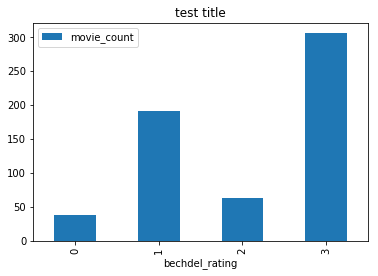

In [6]:
#used
mojo_rate.plot.bar(x = 'bechdel_rating', y = 'movie_count', title = 'test title')

In [7]:
#2nd attempt
#used
mojo_df['bin'] = pd.cut(mojo_df['Rank'], [0, 100, 200, 300, 400, 500, 600, 700, 800],
                          labels=['top 100', 
                                  '100-200', 
                                  '200-300', 
                                  '300-400', 
                                  '400-500',
                                  '500-600',
                                  '600-700',
                                  '700-800'])
bin_mojo_df = mojo_df.groupby(['bin', 'rating'])['title'].count()
table_mojo = bin_mojo_df.to_frame()
table_mojo.rename(columns = {'title': 'movie_count'}, inplace = True)
table_mojo.index.names = ['gross_ranking', 'bechdel']
table_mojo['percentage'] = table_mojo.movie_count / table_mojo.reset_index().groupby('gross_ranking')['movie_count'].sum()
table_mojo_format = table_mojo.style.format({'percentage': '{0:,.2%}'.format})
table_mojo_format

In [8]:
#used
mojo_1 = table_mojo.reset_index()
mojo_w = mojo_1[mojo_1.bechdel == 3].style.format({'percentage': '{0:,.2%}'.format})
mojo_w

,gross_ranking,bechdel,movie_count,percentage
3,top 100,3,53,59.55%
7,100-200,3,47,54.65%
11,200-300,3,43,54.43%
15,300-400,3,36,48.65%
19,400-500,3,40,49.38%
23,500-600,3,38,47.50%
27,600-700,3,33,45.21%
31,700-800,3,16,45.71%


Text(0,0.5,'Count')

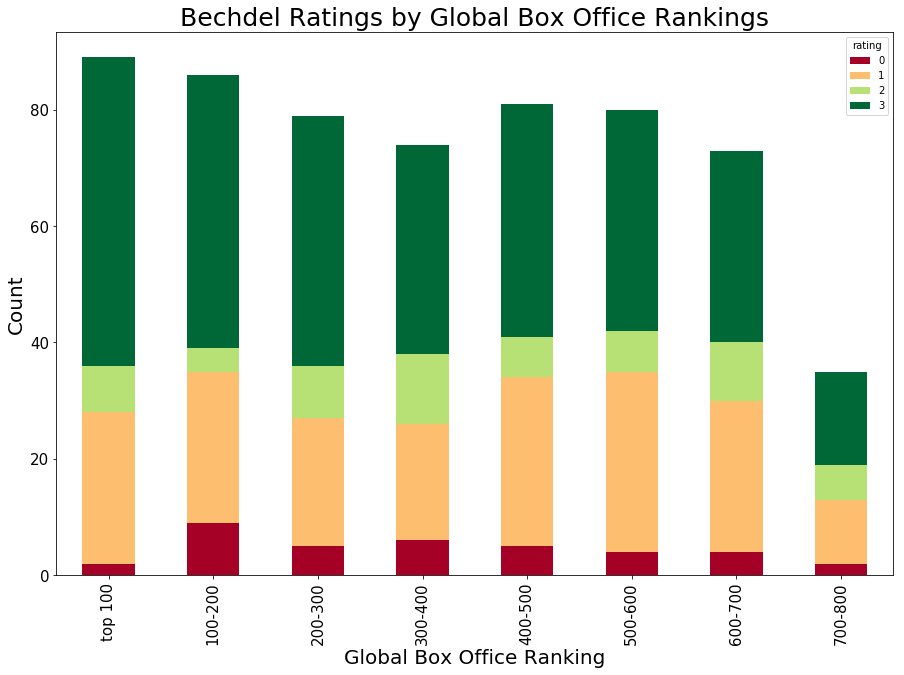

In [13]:
#used
#plotting bar graph. we have to unstack if using 2 group by
mojo_bar = mojo_df.groupby(['bin', 'rating'])['title'].count()
mojo_bar_unstack = mojo_bar.unstack()
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
mojo_bar_unstack.plot.bar(stacked = True, colormap = 'RdYlGn', figsize = (15,10))
plt.title("Bechdel Ratings by Global Box Office Rankings", size = 25)
plt.xlabel("Global Box Office Ranking", size = 20)
plt.ylabel("Count", size = 20)

Text(0,0.5,'Count')

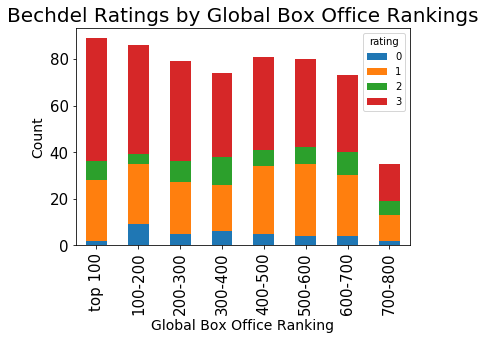

In [11]:
#used
#plotting bar graph. we have to unstack if using 2 group by
mojo_bar = mojo_df.groupby(['bin', 'rating'])['title'].count()
mojo_bar_unstack = mojo_bar.unstack()
mojo_bar_unstack.plot.bar(stacked = True)
plt.title("Bechdel Ratings by Global Box Office Rankings", size = 20)
plt.xlabel("Global Box Office Ranking", size=14)
plt.ylabel("Count", size=14)

## findings
- Prevalence of movies that pass the Bechdel test is high among the top 100 box office grossing movies

- question: can we state that movies with Bechdel rating of "2" is better than movies with Bechdel rating of "0" in terms of portrayal of women in movies?